# Project PacmannAI - Probability
    Nama  : Riyan Zaenal Arifin
    Email : riyanzaenal411@gmail.com

## **Import Dataset**

In [286]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [287]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analisa Deskriptive

### 1. Berapa rata rata umur pada data tersebut?

[Text(0, 0, '39.207')]

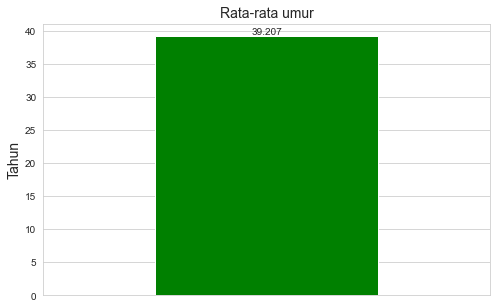

In [288]:
mean = df['age'].mean()
#visualization
score_series = pd.Series(mean)
plt.figure(figsize=(8, 5))
fig = score_series.plot(kind='bar', color = 'green')
plt.xticks([])
plt.ylabel("Tahun", size = 14)
plt.title("Rata-rata umur", size = 14)
fig.bar_label(fig.containers[0], label_type='edge')

Diperoleh rata-rata umur 39.20702541106129 tahun

### 2. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

In [289]:
# Perokok
smoker = df[df['smoker'] == 'yes' ][['charges']]
smoker = smoker['charges'].var()

In [290]:
# Non perokok
nosmoker = df[df['smoker'] == 'no' ][['charges']]
nosmoker = nosmoker['charges'].var()

[Text(0, 0, '1.33207e+08'), Text(0, 0, '3.59254e+07')]

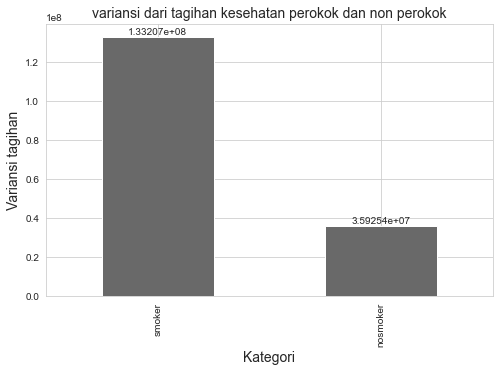

In [291]:
#visualization
score_series = pd.Series([smoker, nosmoker])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "dimgrey", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("Variansi tagihan" , size = 14)
plt.title("variansi dari tagihan kesehatan perokok dan non perokok" , size = 14)
fig.set_xticklabels(["smoker","nosmoker"])
fig.bar_label(fig.containers[0], label_type='edge')

Variansi dari tagihan kesehatan perokok dan non perokok berbeda. Dari hasil di atas diketahui bahwa tagihan kesehatan perokok memiliki variansi 133207311.20634924 sedangkan variansi tagihan kesehatan non perokok memiliki variansi 35925420.496111736.

### 3. Apakah rata rata umur laki-laki dan perempuan yang merokok sama?

In [292]:
#male 
male = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')][['sex', 'age']]
male = male['age'].mean()

In [293]:
#male 
female = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')][['sex', 'age']]
female = female['age'].mean()

[Text(0, 0, '38.4465'), Text(0, 0, '38.6087')]

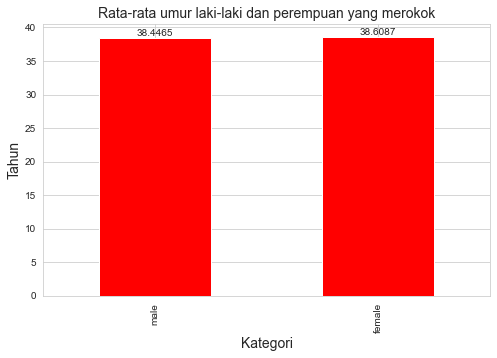

In [294]:
#visualization
score_series = pd.Series([male, female])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "red", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("Tahun", size = 14)
plt.title("Rata-rata umur laki-laki dan perempuan yang merokok", size = 14)
fig.set_xticklabels(["male","female"])
fig.bar_label(fig.containers[0], label_type='edge')

Ya, rata-rata umur laki-laki dan perempuan yang merokok sama yaitu 38 tahun

### 4. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [295]:
# Perokok
charger_smoker = df[df['smoker'] == 'yes' ][['charges']]
charger_smoker = charger_smoker['charges'].mean()

In [296]:
# Non Perokok
charger_nosmoker = df[df['smoker'] == 'no' ][['charges']]
charger_nosmoker = charger_nosmoker['charges'].mean()

[Text(0, 0, '32050.2'), Text(0, 0, '8434.27')]

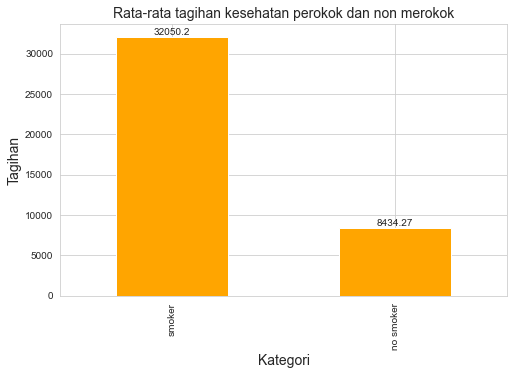

In [297]:
#visualization
score_series = pd.Series([charger_smoker, charger_nosmoker])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "orange", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("Tagihan", size = 14)
plt.title("Rata-rata tagihan kesehatan perokok dan non merokok", size = 14)
fig.set_xticklabels(["smoker","no smoker"])
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas diketahui bahwa rata-rata tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.

### 5. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [298]:
# Perokok
bmi_smoker = df[df['smoker'] == 'yes' ][['bmi']]
bmi_smoker = bmi_smoker['bmi'].sum()

In [299]:
# Non Perokok
bmi_nosmoker = df[df['smoker'] == 'no' ][['bmi']]
bmi_nosmoker = bmi_nosmoker['bmi'].sum()

[Text(0, 0, '8414.11'), Text(0, 0, '32613.5')]

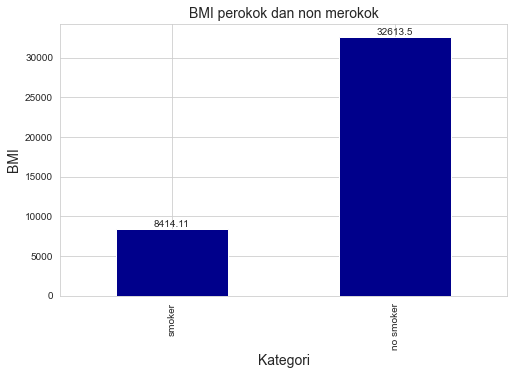

In [300]:
#visualization
score_series = pd.Series([bmi_smoker, bmi_nosmoker])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "darkblue", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("BMI", size = 14)
plt.title("BMI perokok dan non merokok", size = 14)
fig.set_xticklabels(["smoker","no smoker"])
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas diketahui bahwa bmi non perokok lebih tinggi daripada bmi perokok.

## Analisa Variabel Diskrit

### 1. Gender mana yang memiliki tagihan kesehatan paling tinggi?

In [301]:
# male
charger_male = df[df['sex'] == 'male' ][['charges']]
charger_male = charger_male['charges'].sum()

In [302]:
# male
charger_female = df[df['sex'] == 'female' ][['charges']]
charger_female = charger_female['charges'].sum()

[Text(0, 0, '9.43476e+06'), Text(0, 0, '8.32106e+06')]

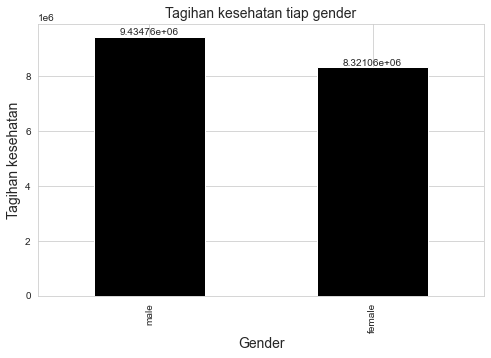

In [303]:
#visualization
score_series = pd.Series([charger_male, charger_female])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "black", kind='bar')
plt.xlabel("Gender" , size = 14)
plt.ylabel("Tagihan kesehatan", size = 14)
plt.title("Tagihan kesehatan tiap gender", size = 14)
fig.set_xticklabels(["male","female"])
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas, dapat diketahui bahwa gender male (laki-laki) memiliki tagihan kesehatan paling tinggi.

### 2. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [304]:
reg_prop = pd.DataFrame(df['region'].value_counts())
reg_prop['Propotion %'] = (reg_prop['region']/reg_prop['region'].sum()) * 100
reg_prop

,region,Propotion %
southeast,364,27.204783
southwest,325,24.289985
northwest,325,24.289985
northeast,324,24.215247


In [305]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=reg_prop.index, values=reg_prop['Propotion %'], textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title='Proporsi data banyak orang tiap region')
fig.show()


Berdasarkan hasil di atas, dapat diketahui bahwa mayoritas proporsi di setiap region hampir sama, yakni 24%. Hanya proporsi region southeast yang berbeda yaitu 27%

### 3. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [306]:
smok_prop = pd.DataFrame(df['smoker'].value_counts())
smok_prop['Propotion %'] = (smok_prop['smoker']/smok_prop['smoker'].sum()) * 100
smok_prop

,smoker,Propotion %
no,1064,79.521674
yes,274,20.478326


In [307]:
fig = go.Figure(data=[go.Pie(labels=smok_prop.index, values=smok_prop['Propotion %'], textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title='Proporsi data banyak perokok dan non perokok')
fig.show()

Berdasarkan hasil di atas, dapat diketahui bahwa proporsi non perokok lebih tinggi daripada proporsi perokok.

### 4. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [308]:
male_smok = len(df[(df['sex'] == 'male') & (df['smoker'] == 'yes')][['sex']])/len(df[df['smoker'] == 'yes'])
male_smok

0.5802919708029197

[Text(0, 0, '0.580292')]

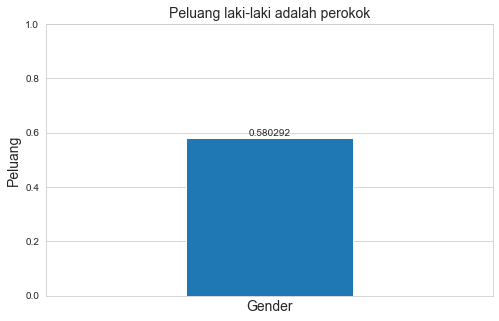

In [309]:
#visualization
score_series = pd.Series(male_smok)
plt.figure(figsize=(8, 5))
fig = score_series.plot(kind='bar',width = 0.3)
plt.xticks([])
plt.xlabel("Gender" , size = 14)
plt.ylabel("Peluang",  size = 14)
plt.title("Peluang laki-laki adalah perokok",  size = 14)
plt.ylim(0, 1)
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas, dapat diketahui bahwa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah sebesar 58%

### 5. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

Text(0.5, 1.0, 'Distribusi Peluang Besar Tagihan Dari Tiap Region')

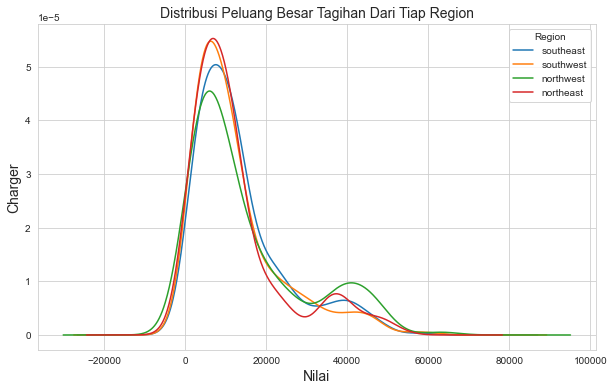

In [310]:
#plot distribution of points by team 
plt.figure(figsize=(10, 6))
df.groupby('region')['charges'].plot(kind='kde')

#add legend
plt.legend(['southeast', 'southwest', 'northwest' , 'northeast'], title='Region')

#add x-axis label
plt.xlabel('Nilai', size = 14)
plt.ylabel("Charger" , size = 14)
plt.title("Distribusi Peluang Besar Tagihan Dari Tiap Region" , size = 14)

Berdasarkan distribusi peluang masing-masing region di atas mayoritas memiliki bentuk distribusi bimodal, karena memiliki 2 puncak

## Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi
        a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
            atau
        b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas16.7k

In [311]:
#a
satua = len(df[(df['bmi'] > 25) & (df['charges'] > 16700)])/len(df[df['bmi'] > 25])

In [312]:
#b
satub = len(df[(df['bmi'] < 25) & (df['charges'] > 16700)])/len(df[df['bmi'] < 25])

[Text(0, 0, '0.259395'), Text(0, 0, '0.208163')]

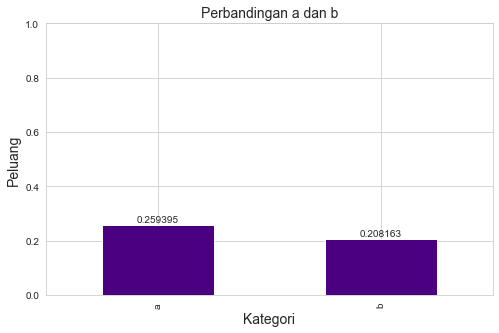

In [313]:
#visualization
score_series = pd.Series([satua, satub])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "indigo", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("Peluang", size = 14)
plt.title("Perbandingan a dan b", size = 14)
fig.set_xticklabels(["a","b"])
plt.ylim(0, 1)
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas diketahui bahwa kejadian yang lebih mungkin terjadi dari a dan b adalah kejadian a, karena memiliki peluang sebesar 25.9% sedangkan peluang b hanya sebesar 20.8%

2. Mana yang lebih mungkin terjadi
        a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatandiatas 16.7k, 
        atau
        b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatandiatas 16.7k

In [314]:
#a
duaa = len(df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700) ])/len(df[(df['smoker'] == 'yes') & (df['bmi'] > 25)])

In [315]:
#b
duab = len(df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700) ])/len(df[(df['smoker'] == 'no') & (df['bmi'] > 25)])

[Text(0, 0, '0.981735'), Text(0, 0, '0.0779817')]

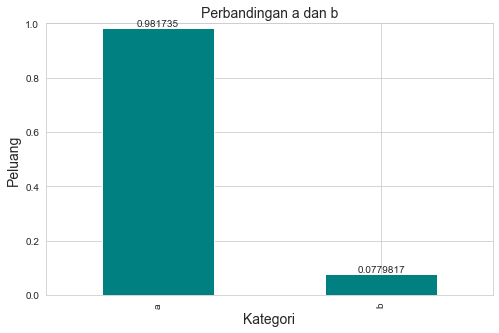

In [316]:
#visualization
score_series = pd.Series([duaa, duab])
plt.figure(figsize=(8, 5))
fig = score_series.plot(color = "teal", kind='bar')
plt.xlabel("Kategori" , size = 14)
plt.ylabel("Peluang", size = 14)
plt.title("Perbandingan a dan b", size = 14)
fig.set_xticklabels(["a","b"])
plt.ylim(0, 1)
fig.bar_label(fig.containers[0], label_type='edge')

Berdasarkan hasil di atas diketahui bahwa kejadian yang lebih mungkin terjadi dari a dan b adalah kejadian a, karena memiliki peluang sebesar 98.1% sedangkan peluang b hanya sebesar 7.7%

## Analisa Korelasi Variable

Sebelum masuk ke korelasi, kita harus memastikan apakah ada keterhubungan antara umur dan bmi menggunakan kovarian.

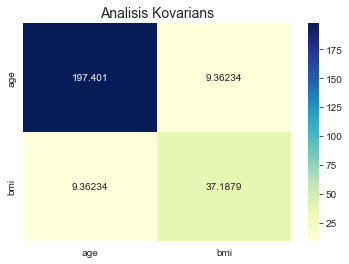

In [317]:
# Calculate covariance matrix
covariance_matrix = np.cov(df['age'], df['bmi'])
labs = ['age','bmi']
sns.heatmap(covariance_matrix, annot=True, fmt='g', xticklabels=labs, yticklabels=labs, cmap='YlGnBu')
#add customized title to heatmap
plt.title('Analisis Kovarians', loc='center', size=14)
plt.show()

Didapat angka kovarians mendekati 0, dapat disimpulkan bahwa data tersebut relatif tidak berhubungan. Artinya, kenaikan nilai pada yang satu bisa meningkatkan atau tidak meningkatkan nilai pada yang lain. Untuk memastikan hal tersebut, bisa melakukan cek korelasi.

In [318]:
df[['age', 'bmi']].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


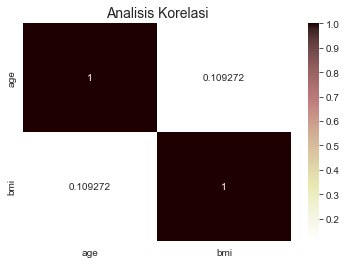

In [319]:
# Create a heatmap using the data
sns.heatmap(df[['age', 'bmi']].corr(), cmap='pink_r', annot=True, fmt='g')
#add customized title to heatmap
plt.title('Analisis Korelasi', loc='center', size=14)
# Show the plot
plt.show()

Berdasarkan nilai korelasi di atas dapat diketahui sebagai korelasi positif, namun termasuk korelasi yang lemah karena mendekati 0. Sehingga dapat disimpulkan bahwa kenaikan umur dapat diikuti oleh bmi namun tidak terlalu sering mengikuti kenaikan.

## Pengujian Hipotesis

### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

#### Hipotesis
        H0 = Rata-rata tagihan kesehatan perokok <= rata-rata tagihan kesehatan non perokok
        H1 = Rata-rata tagihan kesehatan perokok > rata-rata tagihan kesehatan non perokok

#### Hitung Uji Statistik

In [320]:
stat_smoker = df[df['smoker'] == 'yes' ][['charges']].head(25)
stat_smoker

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
34,51194.55914
38,39774.27630
39,48173.36100


In [321]:
stat_nosmoker = df[df['smoker'] == 'no' ][['charges']].head(25)
stat_nosmoker

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692
10,2721.32080


In [322]:
np.var(stat_smoker['charges']), np.var(stat_nosmoker['charges'])

(112685936.46114402, 45289467.467603594)

In [323]:
alpha = 0.05
stat, p = ttest_ind(a = stat_smoker['charges'], b = stat_nosmoker['charges'], equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 10.0894, p-value = 0.0000


#### Pengambilan Keputusan

In [324]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


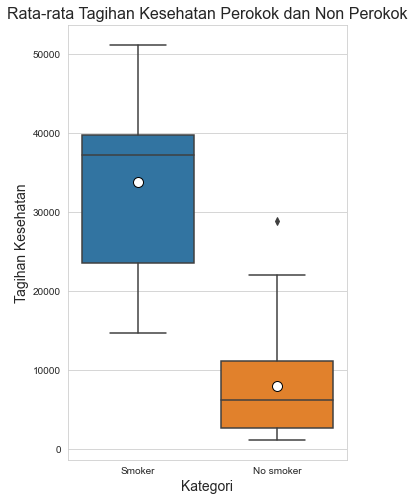

In [325]:
d1 = pd.DataFrame({
    'Smoker':stat_smoker['charges'].reset_index(drop=True),
    'No smoker':stat_nosmoker['charges'].reset_index(drop=True)
})
# box plot for marks column
plt.figure(figsize=(5, 8))
sns.boxplot(data=d1,showmeans=True, meanprops={
                        "marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Kategori", size=14)
plt.ylabel("Tagihan Kesehatan", size=14)
plt.title("Rata-rata Tagihan Kesehatan Perokok dan Non Perokok", size=16)
plt.show()

Maka dapat kita simpulkan bahwa menolak H0. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa rata-rata tagihan kesehatan perokok lebih tinggi daripada rata-rata tagihan kesehatan non perokok. Selain itu juga dibuktikan dengan gambar visualisasi pada titik putih sebagai rata-rata

### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

#### Hipotesis

        H0 = Rata-rata tagihan BMI diatas 25 <= rata-rata tagihan BMI dibawah 25
        H1 = Rata-rata tagihan BMI diatas 25 > rata-rata tagihan BMI dibawah 25

#### Hitung Uji Statistik

In [326]:
diatas = df[df['bmi'] > 25 ][['bmi']].head(25)
diatas

,bmi
0,27.900
1,33.770
2,33.000
4,28.880
5,25.740
6,33.440
7,27.740
8,29.830
9,25.840
10,26.220


In [327]:
dibawah = df[df['bmi'] < 25 ][['bmi']].head(25)
dibawah

,bmi
3,22.705
15,24.600
17,23.845
26,23.085
28,17.385
35,20.425
37,20.800
42,21.780
48,24.530
58,22.880


In [328]:
np.var(diatas['bmi']), np.var(dibawah['bmi'])

(20.934450000000005, 4.29418176)

In [329]:
alpha = 0.05
stat, p = ttest_ind(a = diatas['bmi'], b = dibawah['bmi'], equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 9.3226, p-value = 0.0000


#### Pengambilan Keputusan

In [330]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


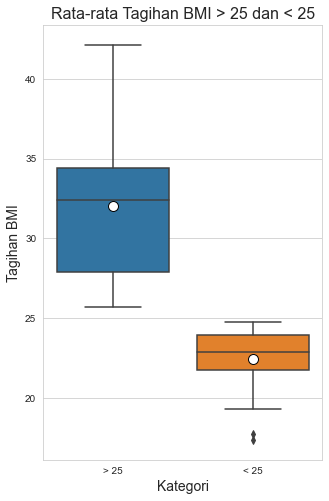

In [331]:
d2 = pd.DataFrame({
    '> 25':diatas['bmi'].reset_index(drop=True),
    '< 25':dibawah['bmi'].reset_index(drop=True)
})
# box plot for marks column
plt.figure(figsize=(5, 8))
sns.boxplot(data=d2,showmeans=True, meanprops={
                        "marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Kategori", size=14)
plt.ylabel("Tagihan BMI", size=14)
plt.title("Rata-rata Tagihan BMI > 25 dan < 25", size=16)
plt.show()

Maka dapat kita simpulkan bahwa menolak H0. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa rata-rata tagihan BMI diatas 25 lebih tinggi daripada rata-rata tagihan BMI dibawah 25. Selain itu juga dibuktikan dengan gambar visualisasi pada titik putih sebagai rata-rata

### 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

#### Hipotesis

        H0 = Rata-rata tagihan kesehatan laki-laki <= rata-rata tagihan kesehatan perempuan
        H1 = Rata-rata tagihan kesehatan laki-laki > rata-rata tagihan kesehatan perempuan

#### Hitung Uji Statistik

In [332]:
laki = df[df['sex'] == 'male' ][['charges']]
laki

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
8,6406.41070
...,...
1324,4239.89265
1325,13143.33665
1327,9377.90470
1329,10325.20600


In [333]:
prem = df[df['sex'] == 'female' ][['charges']]
prem

,charges
0,16884.92400
5,3756.62160
6,8240.58960
7,7281.50560
9,28923.13692
...,...
1332,11411.68500
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [334]:
np.var(laki['charges']), np.var(prem['charges'])

(167998626.4342233, 123660966.64456923)

In [335]:
alpha = 0.05
stat, p = ttest_ind(a = laki['charges'], b = prem['charges'], equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 2.1009, p-value = 0.0179


#### Pengambilan Keputusan

In [336]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


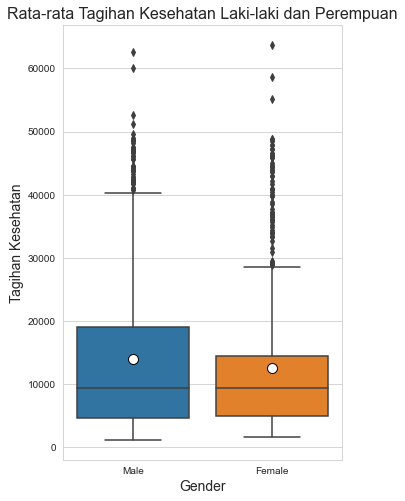

In [337]:
d3 = pd.DataFrame({
    'Male':laki['charges'].reset_index(drop=True),
    'Female':prem['charges'].reset_index(drop=True)
})
# box plot for marks column
plt.figure(figsize=(5, 8))
sns.boxplot(data=d3,showmeans=True, meanprops={
                        "marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Gender", size=14)
plt.ylabel("Tagihan Kesehatan", size=14)
plt.title("Rata-rata Tagihan Kesehatan Laki-laki dan Perempuan", size=16)
plt.show()

Maka dapat kita simpulkan bahwa gagal menolak H0. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa rata-rata tagihan kesehatan laki-laki kurang dari atau sama dengan rata-rata tagihan kesehatan perempuan. Selain itu juga dibuktikan dengan gambar visualisasi pada titik putih sebagai rata-rata.